# PS2
## Name: Xinyu Chang

In [1]:
# Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1 A simple classification task

### 1.1 (1pt) Load the data. Find:

#### (a) the number of rows and columns

In [2]:
skin_df = pd.read_csv("skin-nonskin.csv", sep="\t")
skin_df.shape

(245057, 4)

There are 245057 rows and 4 columns.

#### (b) print a few lines of data

In [3]:
skin_df.head()

,B,G,R,Label
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


#### (c) does it contain any missing values?

In [4]:
skin_df.isnull().sum()

B        0
G        0
R        0
Label    0
dtype: int64

There are no missing values in the dataset.

#### (d) what are maximum and minimum values for R, G, B?

In [5]:
skin_df.min()

B        0
G        0
R        0
Label    1
dtype: int64

In [6]:
skin_df.max()

B        255
G        255
R        255
Label      2
dtype: int64

Here are the maximum and minimum values for R, G, B:  
R: Min = 0, Max = 255  
G: Min = 0, Max = 255  
B: Min = 0, Max = 255  

#### (e) what are the possible labels?

In [7]:
skin_df.Label.value_counts()

2    194198
1     50859
Name: Label, dtype: int64

The possible labels are 1 and 2, where "1" indicates skin and "2" indicates non-skin.

#### 1.1.2 (1pt) Note that the feature space here is about the same as “color space”, you have probably seen color selectors that work on such a color space. Here is the color selector of gimp:

#### (a) What is the dimensionality of the feature space?

The feature space, in the context of the RGB color space, is 3-dimensional(3D). Each color can be represented as a point in this space, where the three dimensions correspond to the intensity of the Red (R), Green (G), and Blue (B) components. 

#### (b) In this feature space, does the class of feasible skin tones have a linear or non-linear boundary?

In the RGB color space, the boundary between skin and non-skin tones is typically **non-linear**. Skin tones varied greatly between individuals due to factors such as ethnicity, lighting conditions, and individual differences（more variance). Therefore, skin tones can occupy a large, irregular region within the RGB color space that cannot be accurately segregated from non-skin tones using a single straight line (linear boundary). Typically, more complex, nonlinear decision boundaries are required to accurately distinguish skin tones from other tones.

#### (c) Given the R,G,B values, is there any uncertainty if the given tone is a possible skin tone?

In my perspective, classifying skin tones based on the R, G, B values demonstrates **minimal uncertainty**. This viewpoint is anchored on an inherent principle: if a color has the potential to be perceived as a skin tone, it should be categorically classified as such. This perspective hinges on a broad, encompassing definition of skin tones in the RGB color space, ensuring that any hue, which could feasibly be recognized as a skin tone under various conditions or variations, is indeed classified as one.

However, a few considerations could introduce elements of uncertainty. Firstly, the vast diversity of human skin tones spans a wide spectrum of colors. Given this diversity, strict RGB boundaries might inadvertently omit subtle hues that are genuinely natural skin tones. Secondly, while the RGB color space is discrete, with each channel ranging from 0 to 255, human skin tones function as a continuous variable. Minor variations in skin tone could map to identical RGB values, leading to potential ambiguities. Furthermore, environmental factors, such as lighting conditions, can significantly influence the appearance of a skin tone. Under diverse lighting, the same skin tone might project different appearances, mapping onto varied RGB values. In summary, while classification based on R, G, B values offers a generally reliable framework, the inherent uncertainties in RGB representation, compounded by the vast variability of human skin tones, suggest that this classification retains a degree of uncertainty.

#### 1.1.3 (1pt) What is the accuracy of a naive classifier that categorizes all samples as the majority class? 

In [8]:
naive_accuracy = (skin_df['Label'] == skin_df['Label'].mode()[0]).mean()
naive_accuracy

0.7924605295910747

The accuracy of a naive classifier that categorizes all samples as the majority class is 0.792

#### 1.1.4 (1pt) Create the feature space X (the R, G, B values) and the target variable y (the labels). Split both X and y into training and validation sets (80% for training, 20% for testing).

In [9]:
X = skin_df[['R', 'G', 'B']].values
y = skin_df['Label'].values
# Split data into training and validation sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((196045, 3), (49012, 3))

### 1.2 knn (1pt)

#### 1. Compute accuracy on both training and validation data by using knn.

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

accuracy_train, accuracy_test

(0.9996072330332322, 0.9994083081694279)

The accuracy on training data is 0.9996 and the accuracy on the validation data is 0.9994.

#### 2. How well does knn perform compared to the naive model above and why?

k-NN:  
Training Accuracy: 0.9996  
Validation Accuracy: 0.9994  

Naive Model:  
Accuracy: 0.7925  

The knn model exhibits superior performance compared to the naïve model in terms of accuracy, hence highlighting the significance of including feature information, specifically the red (R), green (G), and blue (B) values, to enhance predictive outcomes. The knn algorithm, with its ability to establish non-linear decision boundaries, effectively captures the intricate patterns present in the feature space. The model's capacity to generalize effectively to unfamiliar data is reinforced by its strong performance on both the training and validation sets, hence increasing its practical utility.

## 2 Decision trees (6 pts)

#### 2.1 Maximum depth in decision tress

In [11]:
loan_data = pd.read_csv('loan_approval_dataset.csv')
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,NotGraduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,NotGraduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [12]:
non_numeric_columns = loan_data.select_dtypes(include=['object'])
print(non_numeric_columns.head())

     education self_employed loan_status
0     Graduate            No    Approved
1  NotGraduate           Yes    Rejected
2     Graduate            No    Rejected
3     Graduate            No    Rejected
4  NotGraduate           Yes    Rejected


In [13]:
loan_data = loan_data.drop(columns=['loan_id'])

In [14]:
var0 = {"education": {"Graduate": 0, "NotGraduate": 1},
        "self_employed": {"No": 0, "Yes": 1},
        "loan_status": {"Approved": 0, "Rejected": 1}}
loan_data = loan_data.replace(var0)
loan_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [15]:
X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1. (0.5pt) What kind of decision boundary do you expect to see based on trees?

When utilizing decision trees in classification problems, we can typically anticipate decision boundaries that are axis-parallel and form a segmented, "staircase"-like structure in the feature space. This characteristic shape arises because decision trees create boundaries by successively splitting the data along feature axes, according to specific threshold values, to separate the classes in the training data. Each decision rule (or split) corresponds to a straight line that is perpendicular to one of the feature axes, and together, these lines create a series of **"boxes"** or **"rectangles"** in the feature space, each assigned to a particular class prediction. Consequently, decision boundaries in decision tree models are often **non-linear** and piecewise constant, adept at delineating complex structures in the data, yet they maintain a certain geometric simplicity due to their axis-parallel nature.

#### 2. (0.5pt) Explain what the maximum depth parameter does. Do large or small values for maximum depth cause overfitting? (Hint: Check out sklearn’s documentation.)

Maximum depth controls the maximum level of the tree. A large value of levels can create a complex model that captures noise in the data (potentially overfitting).

#### 3. (1pt) Run a series of decision tree models of different maximum depth in a loop. Start with a small depth, and increase it into the overfitting territory so that the model starts overfitting. At each iteration, store both validation and training accuracy.Make a plot where you show how both training and validation accuracy depend on maximum depth. Try to make the graph so that the differences are easily visible. (Hint: Try plotting log(1−accuracy) instead of just accuracy.)

In [17]:
train_accuracy_ls = []
val_accuracy_ls = []

depths = range(1, 20)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    val_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    train_accuracy_ls.append(train_accuracy)
    val_accuracy_ls.append(val_accuracy)
    print("Max Depth:", depth, "Training Accuracy:", train_accuracy, "Validation Accuracy:", val_accuracy)

Max Depth: 1 Training Accuracy: 0.9528550512445095 Validation Accuracy: 0.9566744730679156
Max Depth: 2 Training Accuracy: 0.9572474377745241 Validation Accuracy: 0.9590163934426229
Max Depth: 3 Training Accuracy: 0.9642752562225476 Validation Accuracy: 0.9637002341920374
Max Depth: 4 Training Accuracy: 0.9692532942898975 Validation Accuracy: 0.9672131147540983
Max Depth: 5 Training Accuracy: 0.9756954612005857 Validation Accuracy: 0.968384074941452
Max Depth: 6 Training Accuracy: 0.9830161054172767 Validation Accuracy: 0.9660421545667447
Max Depth: 7 Training Accuracy: 0.9862371888726208 Validation Accuracy: 0.9672131147540983
Max Depth: 8 Training Accuracy: 0.990922401171303 Validation Accuracy: 0.9695550351288056
Max Depth: 9 Training Accuracy: 0.9929721815519765 Validation Accuracy: 0.9695550351288056
Max Depth: 10 Training Accuracy: 0.9935578330893119 Validation Accuracy: 0.968384074941452
Max Depth: 11 Training Accuracy: 0.99502196193265 Validation Accuracy: 0.9718969555035128
Ma

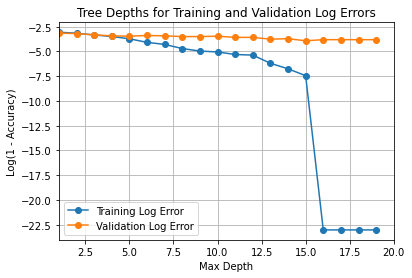

In [18]:
epsilon = 1e-10
log_train_err = np.log(1 - np.array(train_accuracy_ls) + epsilon)
log_val_err = np.log(1 - np.array(val_accuracy_ls) + epsilon)

plt.figure()
plt.plot(depths, log_train_err, '-o', label='Training Log Error')
plt.plot(depths, log_val_err, '-o', label='Validation Log Error')
plt.title('Tree Depths for Training and Validation Log Errors')
plt.xlabel('Max Depth')
plt.ylabel('Log(1 - Accuracy)')
plt.legend()
plt.grid(True)
plt.xlim(1, 20) 
plt.show()

The model starts overffiting from max depth equals to 16 and the training accuracy is 1.0 and validation accuracy is 0.977751756440281.

#### 4. (0.5pt) What is the best validation accuracy that you get? What is the corresponding maximum depth?

In [19]:
best_va_acc = max(val_accuracy_ls)
best_depth = depths[val_accuracy_ls.index(best_va_acc)]
print("The best validation accuracy is:", best_va_acc, "at max depth of", best_depth)

The best validation accuracy is: 0.9800936768149883 at max depth of 15


The best validation accuracy that I get is 0.9800936768149883 at max depth of 15.

#### 5. (0.5pt) Discuss your findings: where does the model start overfitting? What is the optimal depth?

The model begins to show signs of overfitting around a Max Depth of 4. From the graph, we can observe that, after this point, the training log error consistently decreases, while the validation log error plateaus and even slightly rises. This divergence between training and validation performance is a hallmark of overfitting. Additionally, the output data corroborates this observation: after a Max Depth of 4, the training accuracy consistently approaches 1, indicating perfect fit to the training data, while the validation accuracy does not experience a corresponding, significant improvement.

The optimal depth for this model appears to be around 15. At this depth, the validation accuracy reaches its peak 0.9800936768149883, as per the output data. Beyond this point, although the training accuracy reaches perfection (a value of 1), the validation accuracy does not show substantial improvement and even slightly drops, indicating that the model might not generalize well to new data beyond this depth.

## 2.2 Minimum sample size to split (3pt) 
### Next, let’s repeat 1.3 with “min_sample_split”:

#### 1. (0.5pt) Explain what the min_sample_split parameter does. Do large or small values lead to overfitting?

The min_samples_split parameter determines the smallest quantity of data points that must reside in a node for a potential split to be considered at that node during the tree-building process. When set to smaller values, the parameter allows the tree to create splits even in regions of the data that are sparsely populated, thereby enabling the model to adapt closely, perhaps too closely, to the training data. This heightened adaptability might allow the tree to model not only the underlying patterns but also the inherent noise within the training data, potentially leading to overfitting.

#### 2. (1pt) Run a series of decision tree models with different min_sample_split values in a loop. Try to cover both underfitting and overfitting. Each time store both validation and training accuracy. Make a plot where you show how both training and validation accuracy depend on the parameter.

In [20]:
min_samples_splits = range(2, 500, 30)
train_acc = []
val_acc = []

for min_samples_split in min_samples_splits:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, train_pred))
    val_acc.append(accuracy_score(y_test, val_pred))
    
    print("Min Samples Split:", min_samples_split, "Training Accuracy:", train_acc[-1], "Validation Accuracy:", val_acc[-1])

Min Samples Split: 2 Training Accuracy: 1.0 Validation Accuracy: 0.977751756440281
Min Samples Split: 32 Training Accuracy: 0.9882869692532943 Validation Accuracy: 0.9707259953161592
Min Samples Split: 62 Training Accuracy: 0.9850658857979502 Validation Accuracy: 0.9742388758782201
Min Samples Split: 92 Training Accuracy: 0.9803806734992679 Validation Accuracy: 0.968384074941452
Min Samples Split: 122 Training Accuracy: 0.9803806734992679 Validation Accuracy: 0.968384074941452
Min Samples Split: 152 Training Accuracy: 0.9736456808199122 Validation Accuracy: 0.9707259953161592
Min Samples Split: 182 Training Accuracy: 0.9736456808199122 Validation Accuracy: 0.9707259953161592
Min Samples Split: 212 Training Accuracy: 0.9689604685212299 Validation Accuracy: 0.9672131147540983
Min Samples Split: 242 Training Accuracy: 0.9689604685212299 Validation Accuracy: 0.9672131147540983
Min Samples Split: 272 Training Accuracy: 0.96398243045388 Validation Accuracy: 0.9648711943793911
Min Samples Spl

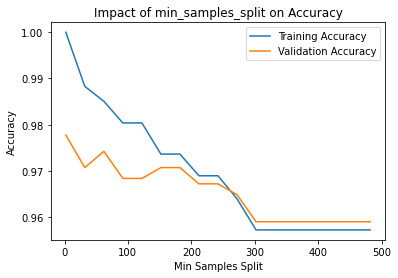

In [21]:
plt.plot(min_samples_splits, train_acc, label='Training Accuracy')
plt.plot(min_samples_splits, val_acc, label='Validation Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Impact of min_samples_split on Accuracy')
plt.show()

#### 3. (0.5pt) What is the best validation accuracy you get? What is the corresponding min_sample_split?

In [22]:
best_val_acc = max(val_acc)
corres_split = min_samples_splits[val_acc.index(best_val_acc)]
print("The best validation accuracy is:", best_val_acc, "at min_sample_split of",corres_split)

The best validation accuracy is: 0.977751756440281 at min_sample_split of 2


#### 4. (0.5pt) Discuss your findings: where does the model start overfitting?

The model begins to show signs of overfitting at min_samples_split of 2, as evidenced by the gap between the training accuracy and validation accuracy. Specifically, at a min_samples_split of 2, the training accuracy is a perfect 1.0, while the validation accuracy is 0.977751756440281. This divergence between training and validation performance is a hallmark of overfitting. This significant difference between training and validation accuracy suggests that the model may be too closely fitting to the nuances of the training data and not generalizing as well to unseen data.

#### 5. (0.5pt) Write a double loop over both parameters. Try to pick a number of values not too different from what you found above when analyzing those individually. Store the best result and the respective parameters.

In [23]:
min_samples_splits = range(2, 500, 30)
depths = range(1, 20, 5)
best_val_acc = 0  
best_depth = None
best_min_samples_split = None

for max_depth in depths:
    for min_samples_split in min_samples_splits:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        val_pred = model.predict(X_test)

        train_acc = accuracy_score(y_train, train_pred)
        val_acc = accuracy_score(y_test, val_pred)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_depth = max_depth
            best_min_samples_split = min_samples_split
        print("Max Depth:", max_depth, "Min Samples Split:", min_samples_split, "Training Accuracy:", train_acc, "Validation Accuracy:", val_acc)
print("\nBest Validation Accuracy:", best_val_acc, "at Max Depth:", best_depth, "and Min Samples Split:", best_min_samples_split)

Max Depth: 1 Min Samples Split: 2 Training Accuracy: 0.9528550512445095 Validation Accuracy: 0.9566744730679156
Max Depth: 1 Min Samples Split: 32 Training Accuracy: 0.9528550512445095 Validation Accuracy: 0.9566744730679156
Max Depth: 1 Min Samples Split: 62 Training Accuracy: 0.9528550512445095 Validation Accuracy: 0.9566744730679156
Max Depth: 1 Min Samples Split: 92 Training Accuracy: 0.9528550512445095 Validation Accuracy: 0.9566744730679156
Max Depth: 1 Min Samples Split: 122 Training Accuracy: 0.9528550512445095 Validation Accuracy: 0.9566744730679156
Max Depth: 1 Min Samples Split: 152 Training Accuracy: 0.9528550512445095 Validation Accuracy: 0.9566744730679156
Max Depth: 1 Min Samples Split: 182 Training Accuracy: 0.9528550512445095 Validation Accuracy: 0.9566744730679156
Max Depth: 1 Min Samples Split: 212 Training Accuracy: 0.9528550512445095 Validation Accuracy: 0.9566744730679156
Max Depth: 1 Min Samples Split: 242 Training Accuracy: 0.9528550512445095 Validation Accuracy

### 3 Random forests (4 pts)
### Now it is time to use random forests. Check out sklearn’s RandomForestClassifier.
#### 1. (1pt) Explain what the n_estimators parameter does.

The n_estimators refers to the number of trees in the forest. Essentially, it determines how many individual decision trees will be built in the random forest model. Each tree is built on a bootstrap sample (a random sample taken with replacement) of the training data, and during prediction, each tree in the forest "votes" to determine the final class prediction. Increasing the number of trees can increase the robustness and accuracy of the model, but it also increases computational cost and may lead to diminishing returns after a certain point.

#### 2. (1pt) Run a series of random forest classifiers testing what is the best number of estimators. This may be slow, so you may want to skip quite a few potential values.

In [24]:
n_estimators_values = range(1, 100, 5)
train_acc = []
val_acc = []

best_val_acc = 0
best_n_estimators = None

for n_estimators in n_estimators_values:
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    val_accuracy = accuracy_score(y_test, val_pred)
    
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)
    
    print("n_estimators:", n_estimators, "Training Accuracy:", train_accuracy, "Validation Accuracy:", val_accuracy)
    
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        best_n_estimators = n_estimators
    
print("\nBest Validation Accuracy:", best_val_acc, "with n_estimators:", best_n_estimators)

n_estimators: 1 Training Accuracy: 0.9815519765739386 Validation Accuracy: 0.9543325526932084
n_estimators: 6 Training Accuracy: 0.9953147877013178 Validation Accuracy: 0.9695550351288056
n_estimators: 11 Training Accuracy: 0.9994143484626647 Validation Accuracy: 0.9695550351288056
n_estimators: 16 Training Accuracy: 1.0 Validation Accuracy: 0.977751756440281
n_estimators: 21 Training Accuracy: 0.9997071742313324 Validation Accuracy: 0.9754098360655737
n_estimators: 26 Training Accuracy: 0.9997071742313324 Validation Accuracy: 0.9730679156908665
n_estimators: 31 Training Accuracy: 1.0 Validation Accuracy: 0.9765807962529274
n_estimators: 36 Training Accuracy: 0.9997071742313324 Validation Accuracy: 0.9800936768149883
n_estimators: 41 Training Accuracy: 1.0 Validation Accuracy: 0.9800936768149883
n_estimators: 46 Training Accuracy: 1.0 Validation Accuracy: 0.9765807962529274
n_estimators: 51 Training Accuracy: 1.0 Validation Accuracy: 0.977751756440281
n_estimators: 56 Training Accuracy

#### 3. (1pt) Make a plot where you show how both training and validation accuracy depend on the parameter. What is the best validation accuracy you get? 

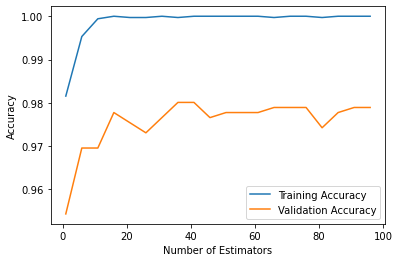

Best Validation Accuracy:  0.9800936768149883  with  36  estimators


In [25]:
plt.plot(n_estimators_values, train_acc, label='Training Accuracy')
plt.plot(n_estimators_values, val_acc, label='Validation Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Best Validation Accuracy: ", best_val_acc, " with ", best_n_estimators, " estimators")

#### 4. (1pt) Where does the model start overfitting, please explain?

The training accuracy quickly approaches 1.0 (or 100%) and stays there after a certain point. This indicates the model is perfectly fitting the training data. The validation accuracy, however, starts fluctuating after around n_estimators of 20. Specifically, it becomes evident around n_estimators of **26** where the training accuracy is nearly perfect (or even perfect for later values), but the validation accuracy does not improve consistently and sometimes even dips. The discrepancy between training and validation accuracies (with the training accuracy being significantly higher) is a clear indication of overfitting. Based on the plot and the given data, the model starts showing signs of overfitting around n_estimators of 26 and onwards.